In [7]:
import requests
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from cycler import cycler

In [26]:
# Define the URL and query parameters
url = "https://publicationtool.jao.eu/core/api/data/maxNetPos"
params = {
    "FromUtc": "2025-01-09T23:00:00.000Z",
    "ToUtc": "2025-01-10T23:00:00.000Z"
}

try:
    # Make the GET request
    response = requests.get(url, params=params, verify=False)
    
    # Check if the request was successful
    response.raise_for_status()  # Raises an HTTPError for bad responses (4xx and 5xx)
    
    # Parse and print the JSON response
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

# Extract the 'data' list
data_list = data['data']

# Create a DataFrame
df = pd.DataFrame(data_list)

c:\Users\rjaka\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicationtool.jao.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [27]:
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'], utc=True)
# Convert to Ljubljana time zone (Europe/Ljubljana)
ljubljana_tz = pytz.timezone('Europe/Ljubljana')
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_convert(ljubljana_tz)
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_localize(None)
df = df.drop(columns=['minALBE', 'minALDE', 'maxALBE', 'maxALDE'])
df.head(1)

In [28]:
# Create the DataFrame for min values
df_min = df.filter(regex='^min', axis=1)
# Create the DataFrame for max values
df_max = df.filter(regex='^max', axis=1)

# Mapping of old column names to Slovenian names for 'min' columns
min_column_mapping = {
    'minAT': 'Avstrija',
    'minBE': 'Belgija',
    'minCZ': 'Češka',
    'minDE': 'Nemčija',
    'minHR': 'Hrvaška',
    'minHU': 'Madžarska',
    'minFR': 'Francija',
    'minPL': 'Poljska',
    'minSI': 'Slovenija',
    'minSK': 'Slovaška',
    'minRO': 'Romunija',
    'minNL': 'Nizozemska',
    # Add more mappings as needed
}

# Mapping of old column names to Slovenian names for 'max' columns
max_column_mapping = {
    'maxAT': 'Avstrija',
    'maxBE': 'Belgija',
    'maxCZ': 'Češka',
    'maxDE': 'Nemčija',
    'maxHR': 'Hrvaška',
    'maxHU': 'Madžarska',
    'maxFR': 'Francija',
    'maxPL': 'Poljska',
    'maxSI': 'Slovenija',
    'maxSK': 'Slovaška',
    'maxRO': 'Romunija',
    'maxNL': 'Nizozemska'
    # Add more mappings as needed
}

# Rename columns for the 'min' DataFrame
df_min = df_min.rename(columns=min_column_mapping)

# Rename columns for the 'max' DataFrame
df_max = df_max.rename(columns=max_column_mapping)

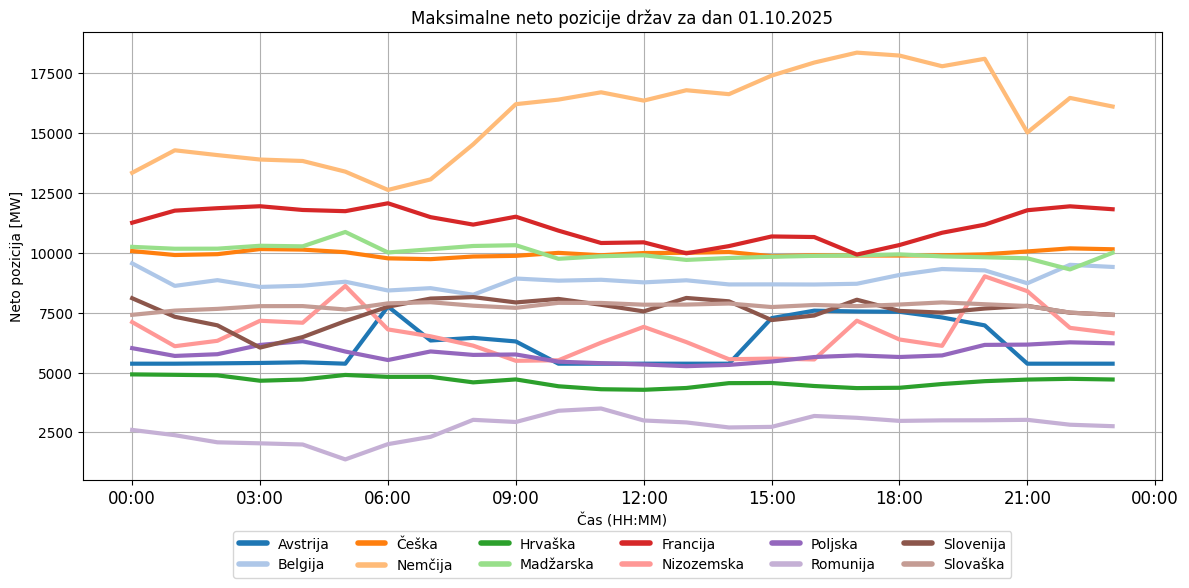

In [29]:
# Extract the date from the first entry in 'dateTimeUtc' column and format it
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'])
date_str = df['dateTimeUtc'].iloc[0].strftime('%d.%m.%Y')

# Set the plot title with the actual date
title = f'Maksimalne neto pozicije držav za dan {date_str}'

# Create a custom color cycle
color_cycle = cycler('color', plt.cm.tab20.colors)  # Using the tab20 color map

# Apply the color cycle to the current plot
plt.rcParams['axes.prop_cycle'] = color_cycle

# Plotting all columns in the df_max DataFrame
plt.figure(figsize=(12, 6))

# Set the line width to 2 (or any value you prefer)
line_width = 3  # You can increase this value to make the lines thicker

for column in df_max.columns:
    plt.plot(df['dateTimeUtc'], df_max[column], label=column, linewidth=line_width, zorder=3)  # Set higher zorder for lines

# Set the plot title dynamically
plt.title(title)

# Set the x-axis and y-axis labels
plt.xlabel('Čas (HH:MM)')
plt.ylabel('Neto pozicija [MW]')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Format x-axis to show only hours and minutes (HH:MM)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Enable grid and set a lower zorder to place it behind the lines
plt.grid(True, zorder=0)  # Set lower zorder for grid

# Change x-axis tick size
plt.tick_params(axis='x', labelsize=12)  # Adjust labelsize as needed (e.g., 12)

# Get the current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Create custom handles with thicker lines for the legend
custom_handles = [Line2D([0], [0], color=handle.get_color(), lw=4, solid_capstyle='round') for handle in handles]

# Display the legend with custom handles and labels
plt.legend(
    handles=custom_handles,
    labels=labels,
    fontsize=10,        # Optional: Adjust the font size for the legend labels
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=6  # You can change this number to adjust the number of columns in the legend
)

# Adjust layout for a clean plot
plt.tight_layout()

# Show the plot
plt.show()
